# Analysis of Airbnb Listings in Cape Town: Pricing, Availability, and Review Insights

### Student Name: ABC

### **Student ID: 000**

### **Date:  04-Dec-2024**

# **Abstract**

This report presents an analysis of the Cape Town Airbnb dataset, focusing on key factors that influence the pricing, availability, and performance of Airbnb listings. The dataset includes detailed information on over 23,000 listings, such as property types, room types, pricing, host information, review scores, and availability. The analysis aims to identify trends, patterns, and anomalies in the data through exploratory data analysis (EDA), including data cleaning, visualization, and statistical techniques. Key findings reveal correlations between room type and price, the positive impact of high review scores, and the influence of the number of bedrooms on accommodation capacity. The report also proposes several research questions for further exploration, including the effect of property type on pricing and the relationship between review scores and listing success. This analysis provides valuable insights that can inform pricing strategies and enhance the guest experience on the Airbnb platform in Cape Town.

# 1. **Introduction**

The goal of this assignment is to analyze a dataset of **Airbnb listings in Cape Town** to uncover insights related to the pricing, availability, and performance of these listings, as well as the factors influencing their success. The dataset contains detailed information on Airbnb listings, including listing details, pricing, availability, and host information, as well as review data, including review scores and the number of reviews.

The objectives of this analysis are:
1. **Explore and clean the dataset**: This involves loading the dataset, identifying and handling missing values, removing duplicates, and ensuring that the data is in the correct format for analysis.
2. **Conduct exploratory data analysis (EDA)**: We will analyze key variables such as price, number of reviews, review scores, room type, and location. Visualizations like histograms, scatter plots, and correlation heatmaps will help us understand the distribution of these variables and their relationships.
3. **Identify trends and patterns**: We will investigate patterns, trends, and anomalies within the data, such as the correlation between pricing and room type or the relationship between review scores and the number of reviews.
4. **Propose research questions**: Based on the data exploration, we will propose several research questions that can be explored further to gain deeper insights into the Airbnb listings and their pricing dynamics in Cape Town.

In this report, the analysis will focus on summarizing key findings and providing actionable insights for potential areas of improvement for Airbnb hosts, pricing strategies, and customer experience. The approach will be methodical and iterative, with a focus on data cleaning, visualization, and statistical analysis to uncover meaningful patterns and trends.

# 2. Dataset Overview

This dataset is sourced from Airbnb and contains information about listings in Cape Town. It includes key features like listing details, pricing, host information, reviews, and availability. The data comprises two main parts: the listing information (e.g., name, location, amenities) and the review details (e.g., review scores, number of reviews, review dates). Together, these provide a complete picture of the Airbnb ecosystem in Cape Town.

# 3. Methodology
## 3.1 Data Loading and Initial Exploration

In this section, we begin by loading the two separate datasets (df1 and df2). These datasets contain information about listings and reviews. We perform an initial exploration to understand their structure, column names, and the number of rows and columns.

- Dataset 1 has 62 columns and 23,564 rows, while Dataset 2 contains 21 columns and 23,564 rows.
- We will also inspect the first few rows to identify any immediate anomalies or issues.

In [289]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')


In [290]:
# Load the datasets
df1 = pd.read_csv('airbnb_1.csv')  # Replace with the actual path if needed
df2 = pd.read_csv('airbnb_2.csv')  # Replace with the actual path if needed

print("Datasets successfully loaded!")

Datasets successfully loaded!


In [291]:
# Preview the first 5 rows of each dataset
df1.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,3191.0,https://www.airbnb.com/rooms/3191,2.024060e+13,29/06/2024,city scrape,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","Mowbray is on the Southern Suburbs line, 6km (...",https://a0.muscache.com/pictures/697022/385407...,3754,https://www.airbnb.com/users/show/3754,Brigitte,21/10/2008,"Cape Town, South Africa",I'm single and love to travel and meeting peop...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/3754/profile_...,https://a0.muscache.com/im/users/3754/profile_...,NaN,1,2,"['email', 'phone', 'work_email']",t,t,"Southern Suburbs, Western Cape, South Africa",Ward 57,NaN,-33.94762,18.47599,Entire home,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Coffee maker"", ""Iron"", ""Cooking basics"", ""Sh...",$635.00,3,730,3.0,3.0,730.0,730.0,3.0,730.0,NaN,t,0,0,30,305,29/06/2024,NaN,t,1,1,0,0
1,298622.0,https://www.airbnb.com/rooms/298622,2.024060e+13,29/06/2024,city scrape,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","The area is very beautiful, with sea and mount...",https://a0.muscache.com/pictures/3547300/40a29...,1539169,https://www.airbnb.com/users/show/1539169,Diane,27/12/2011,"Cape Town, South Africa",I'm a South African who lived for many years i...,within a day,100%,30%,t,https://a0.muscache.com/im/users/1539169/profi...,https://a0.muscache.com/im/users/1539169/profi...,NaN,1,2,"['email', 'phone']",t,t,"Cape Town, Western Cape, South Africa",Ward 61,NaN,-34.20875,18.45940,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,3.0,"[""Pack \u2019n play/Travel crib"", ""Iron"", ""Coo...","$1,500.00",2,180,2.0,2.0,180.0,180.0,2.0,180.0,NaN,t,12,34,64,286,29/06/2024,NaN,f,1,1,0,0
2,357793.0,https://www.airbnb.com/rooms/357793,2.024060e+13,30/06/2024,city scrape,CityChic @ the Piazza meets Table Mountain,"Superb 2 bedroom penthouse, with balcony, in t...",NaN,https://a0.muscache.com/pictures/272b7efe-6924...,1802190,https://www.airbnb.com/users/show/1802190,Liliane,24/02/2012,South Africa,"We are a married couple, with 2 grown-up sons,...",within a few hours,100%,92%,t,https://a0.muscache.com/im/users/1802190/profi...,https://a0.muscache.com/im/users/1802190/profi...,NaN,1,3,"['email', 'phone']",t,t,NaN,Ward 115,NaN,-33.92528,18.42022,Entire rental unit,Entire home/apt,4,2.0,2 baths,2.0,4.0,"[""Coffee maker"", ""Iron"", ""Room-darkening shade...","$2,000.00",4,90,4.0,4.0,90.0,90.0,4.0,90.0,NaN,t,28,58,88,143,30/06/2024,NaN,f,1,1,0,0
3,357993.0,https://www.airbnb.com/rooms/357993,2.024060e+13,29/06/2024,city scrape,Beach View Studio with Balcony Walkout,Camps Bay Guesthouse Studio is an ultra-modern...,The studio is situated in the extremely popula...,https://a0.muscache.com/pictures/c222b47a-fab5...,1811942,https://www.airbnb.com/users/show/1811942,Shannon,26/02/2012,NaN,A fun loving person who is a passionate artist...,NaN,NaN,100%,f,https://a0.muscache.com/im/users/1811942/profi...,https://a0.muscach

In [292]:
df2.head()

,id,listing_url,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3191.0,https://www.airbnb.com/rooms/3191,79,6,1,31/05/2013,18/06/2024,4.82,4.84,4.70,4.97,4.96,4.77,4.81,NaN,t,1,1,0,0,0.59
1,298622.0,https://www.airbnb.com/rooms/298622,71,1,0,09/03/2012,17/01/2024,4.94,4.97,4.89,4.97,4.99,4.87,4.89,NaN,f,1,1,0,0,0.47
2,357793.0,https://www.airbnb.com/rooms/357793,224,16,0,23/07/2012,12/04/2024,4.76,4.87,4.82,4.78,4.79,4.73,4.83,NaN,f,1,1,0,0,1.54
3,357993.0,https://www.airbnb.com/rooms/357993,108,3,0,23/02/2014,08/02/2024,4.79,4.88,4.89,4.93,4.84,4.76,4.64,NaN,f,3,3,0,0,0.86
4,15007.0,https://www.airbnb.com/rooms/15007,46,2,0,15/12/2013,02/04/2024,4.83,4.91,4.85,4.98,4.96,4.93,4.85,NaN,f,4,4,0,0,0.36


In [293]:
# Check the number of rows and columns in each dataset
print("Shape of Dataset 1:", df1.shape)
print("Shape of Dataset 2:", df2.shape)


Shape of Dataset 1: (23564, 62)
Shape of Dataset 2: (23564, 21)


In [294]:
# Check for Columns in each dataset
print("Columns in Dataset 1:")
df1.columns

Columns in Dataset 1:


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
    

In [295]:
print("Columns in Dataset 2:")
df2.columns

Columns in Dataset 2:


Index(['id', 'listing_url', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'], dtype='object')

In [296]:
# Generate summary statistics for numeric columns in both datasets
print("Summary Statistics for Dataset 1:")
df1.describe()

Summary Statistics for Dataset 1:


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,2.356400e+04,2.356400e+04,2.356400e+04,23564.000000,23564.000000,0.0,23564.000000,23564.000000,23564.000000,20215.000000,22986.000000,20203.000000,23564.000000,2.356400e+04,23536.000000,23536.000000,2.353600e+04,2.353600e+04,23536.000000,2.353600e+04,0.0,23564.000000,23564.000000,23564.000000,23564.000000,23564.000000,23564.000000,23564.000000,23564.000000
mean,4.578648e+17,2.024060e+13,1.863474e+08,14.059752,20.145434,NaN,-33.957000,18.472721,3.779240,1.729211,1.903202,2.161461,4.430317,9.290918e+02,4.014276,5.546015,1.061742e+03,1.074686e+03,4.472085,1.068637e+03,NaN,15.370990,33.874597,53.361229,199.196826,11.956544,10.944831,0.947165,0.015108
std,4.736383e+17,0.000000e+00,1.810619e+08,34.267139,72.870128,NaN,0.099377,0.125154,2.423113,1.280726,1.501556,1.915285,16.771508,6.514242e+04,14.976196,16.747445,6.518050e+04,6.518039e+04,15.369906,6.518043e+04,NaN,12.491706,24.342574,35.750683,126.054918,24.569066,24.484327,2.925849,0.202750
min,3.191000e+03,2.024060e+13,3.754000e+03,0.000000,0.000000,NaN,-34.262840,18.320200,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,-1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.852545e+07,2.024060e+13,3.343098e+07,1.000000,1.000000,NaN,-34.017772,18.401710,2.000000,1.000000,1.000000,1.000000,1.000000,9.000000e+01,1.000000,2.000000,2.100000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,0.000000,0.000000,10.000000,88.000000,1.000000,1.000000,0.000000,0.000000
50%,5.269580e+17,2.024060e+13,1.083327e+08,3.000000,3.000000,NaN,-33.928374,18.426200,3.000000,1.000000,1.000000,2.000000,2.000000,3.650000e+02,2.000000,3.000000,3.650000e+02,7.310000e+02,2.200000,7.300000e+02,NaN,18.000000,42.000000,66.000000,220.000000,2.000000,1.000000,0.000000,0.000000
75%,9.497852e+17,2.024060e+13,3.163423e+08,9.000000,12.000000,NaN,-33.910231,18.481763,5.000000,2.000000,2.000000,3.000000,3.000000,1.125000e+03,3.000000,6.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,28.000000,58.000000,88.000000,315.000000,8.000000,5.000000,1.000000,0.000000
max,1.188910e+18,2.024060e+13,5.862068e+08,2635.000000,6436.000000,NaN,-33.572180,18.936030,16.000000,50.000000,50.000000,70.000000,999.000000,1.000000e+07,999.000000,999.000000,1.000000e+07,1.000000e+07,999.000000,1.000000e+07,NaN,30.000000,60.000000,90.000000,365.000000,134.000000,134.000000,39.000000,6.000000


In [297]:
print("Summary Statistics for Dataset 2:")
df2.describe()

Summary Statistics for Dataset 2:


,id,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.356400e+04,23564.000000,23564.000000,23564.000000,18456.000000,18452.000000,18452.000000,18449.000000,18451.000000,18450.000000,18449.000000,23564.000000,23564.000000,23564.000000,23564.000000,18456.000000
mean,4.578648e+17,23.783653,6.486547,0.283993,4.784594,4.781196,4.767311,4.820365,4.825068,4.807350,4.714326,11.956544,10.944831,0.947165,0.015108,0.891768
std,4.736383e+17,45.625007,10.794565,0.855009,3.490894,0.394876,0.393427,0.381740,0.389705,0.345239,0.424377,24.569066,24.484327,2.925849,0.202750,1.031584
min,3.191000e+03,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.852545e+07,1.000000,0.000000,0.000000,4.680000,4.740000,4.700000,4.800000,4.810000,4.750000,4.640000,1.000000,1.000000,0.000000,0.000000,0.190000
50%,5.269580e+17,6.000000,2.000000,0.000000,4.880000,4.900000,4.890000,4.950000,4.960000,4.910000,4.830000,2.000000,1.000000,0.000000,0.000000,0.540000
75%,9.497852e+17,25.000000,8.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.000000,5.000000,1.000000,0.000000,1.200000
max,1.188910e+18,756.000000,178.000000,14.000000,466.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,134.000000,134.000000,39.000000,6.000000,15.180000


In [298]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23564 non-null  float64
 1   listing_url                                   23564 non-null  object 
 2   scrape_id                                     23564 non-null  float64
 3   last_scraped                                  23564 non-null  object 
 4   source                                        23564 non-null  object 
 5   name                                          23563 non-null  object 
 6   description                                   23161 non-null  object 
 7   neighborhood_overview                         13906 non-null  object 
 8   picture_url                                   23564 non-null  object 
 9   host_id                                       23564 non-null 

In [299]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 21 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23564 non-null  float64
 1   listing_url                                   23564 non-null  object 
 2   number_of_reviews                             23564 non-null  int64  
 3   number_of_reviews_ltm                         23564 non-null  int64  
 4   number_of_reviews_l30d                        23564 non-null  int64  
 5   first_review                                  18456 non-null  object 
 6   last_review                                   18456 non-null  object 
 7   review_scores_rating                          18456 non-null  float64
 8   review_scores_accuracy                        18452 non-null  float64
 9   review_scores_cleanliness                     18452 non-null 

In [300]:
# Merge the two datasets on a common column (adjust 'common_column' to your actual column)
merged_df = pd.merge(df1, df2, how='inner', on='id')  # Replace 'id' with the actual common column

# Confirm the merge
print("Datasets merged successfully! Shape of merged dataset:", merged_df.shape)


Datasets merged successfully! Shape of merged dataset: (28732, 82)


In [301]:

# Unique values per column
for col in merged_df.columns:
    print(f"Unique values in {col}: {merged_df[col].nunique()}")

Unique values in id: 22142
Unique values in listing_url_x: 23564
Unique values in scrape_id: 1
Unique values in last_scraped: 2
Unique values in source: 2
Unique values in name: 23035
Unique values in description: 21581
Unique values in neighborhood_overview: 11322
Unique values in picture_url: 23259
Unique values in host_id: 12542
Unique values in host_url: 12542
Unique values in host_name: 5044
Unique values in host_since: 3945
Unique values in host_location: 452
Unique values in host_about: 5291
Unique values in host_response_time: 4
Unique values in host_response_rate: 48
Unique values in host_acceptance_rate: 93
Unique values in host_is_superhost: 2
Unique values in host_thumbnail_url: 12110
Unique values in host_picture_url: 12110
Unique values in host_neighbourhood: 54
Unique values in host_listings_count: 79
Unique values in host_total_listings_count: 101
Unique values in host_verifications: 9
Unique values in host_has_profile_pic: 2
Unique values in host_identity_verified: 2
U

In [302]:
# Missing values
merged_df.isnull().sum()

id                                                   0
listing_url_x                                        0
scrape_id                                            0
last_scraped                                         0
source                                               0
                                                  ... 
calculated_host_listings_count_y                     0
calculated_host_listings_count_entire_homes_y        0
calculated_host_listings_count_private_rooms_y       0
calculated_host_listings_count_shared_rooms_y        0
reviews_per_month                                 7876
Length: 82, dtype: int64

## 3.2 Data Cleaning and Wrangling
In this section, we clean the data by handling missing values, duplicates, and ensuring the data types are correct. We also focus on selecting relevant variables for our analysis.

### 3.2.1. Variable Selection
We selected a subset of relevant variables that provide insight into key aspects of the Airbnb listings. These variables include listing details like name, description, price, host information, and review scores. Columns that were deemed irrelevant or had too many missing values were excluded from the analysis.

In [303]:
# Select a number of variables of interest (aim for 20-30 variables)
variables_of_interest = [
    'id', 'listing_url_x', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_name',
    'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost',
    'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
    'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
    'number_of_reviews', 'review_scores_rating'
]

In [304]:
# Drop columns not in the list of variables of interest
cleaned_df = merged_df[variables_of_interest]

### 3.2.2. Handling Missing Data
We handled missing data by first removing columns with more than 50% missing values. Then, we dropped rows with remaining missing values to ensure the dataset was clean and usable. This approach helps us maintain the integrity of the dataset while focusing on meaningful data.

In [305]:
# Drop columns with excessive missing data (more than 50% missing)
cleaned_df = cleaned_df.dropna(thresh=len(cleaned_df) * 0.5, axis=1)

### 3.2.3. Removing Duplicates and Correcting Data Types
We identified and removed duplicate rows to avoid any data redundancy. We also ensured that the data types for each column were correctly assigned, such as converting the price column to a numeric data type and host_since to datetime format.

In [306]:
# Identify and handle missing values
# For simplicity, we'll drop rows with missing values in this example
cleaned_df = cleaned_df.dropna()

In [307]:
# Check for duplicate rows and remove them if found
cleaned_df = cleaned_df.drop_duplicates()

In [308]:
# Ensure all columns have appropriate data types and convert columns to their correct types if necessary
cleaned_df['host_since'] = pd.to_datetime(cleaned_df['host_since'], errors='coerce')

In [309]:
cleaned_df['price'] = cleaned_df['price'].replace('[\$,]', '', regex=True).astype(float)

### 3.2.4. Text Standardization and Feature Creation
We standardized text columns such as `neighborhood_overview` by converting them to lowercase to maintain consistency. We also considered generating new features based on existing columns, but no new features were created in this particular cleaning step.




In [310]:
# Standardize text columns if applicable (e.g., amenities), and/or generate new columns based on the presence or absence of specific strings or patterns in existing columns
# Example: Standardize the neighborhood_overview column by converting it to lowercase
cleaned_df['neighborhood_overview'] = cleaned_df['neighborhood_overview'].str.lower()

## 3.4 Exploratory Data Analysis (EDA)

In this section, we explore the cleaned dataset by generating summary statistics, analyzing distributions, and investigating relationships between variables.

### 3.4.1 Summary Statistics
We computed summary statistics for the key numeric columns, such as price, bedrooms, and review_scores_rating. The summary includes measures of central tendency (mean, median) and spread (standard deviation, range), which help us understand the distribution of data.


In [311]:
cleaned_df.head()

,id,listing_url_x,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,3191.0,https://www.airbnb.com/rooms/3191,Malleson Garden Cottage,"This is a lovely, separate, self-catering cott...","mowbray is on the southern suburbs line, 6km (...",3754,Brigitte,2008-10-21,"Cape Town, South Africa",within an hour,100%,f,Ward 57,-33.947620,18.475990,Entire home,Entire home/apt,2,1 bath,1.0,1.0,635.0,3,730,79,4.82
1,298622.0,https://www.airbnb.com/rooms/298622,Stunning Sea View apt on the Cape Peninsula,"This light, airy, well equipped self-catering...","the area is very beautiful, with sea and mount...",1539169,Diane,2011-12-27,"Cape Town, South Africa",within a day,100%,t,Ward 61,-34.208750,18.459400,Entire rental unit,Entire home/apt,4,1 bath,1.0,3.0,1500.0,2,180,71,4.94
4,15007.0,https://www.airbnb.com/rooms/15007,Blaauwberg House (now with inverter),Welcome to our self-catering beach-front famil...,"bloubergstrand is a lovely, cosy suburb near c...",59072,Dirk,2009-12-01,"Cape Town, South Africa",within a few hours,100%,t,Ward 23,-33.800010,18.460630,Entire home,Entire home/apt,6,3 baths,3.0,4.0,3102.0,2,120,46,4.83
6,370531.0,https://www.airbnb.com/rooms/370531,Light & Fun House in Cape Town,"Our charming, historic Victorian house has loa...","observatory has an alternative, bohemian vibe ...",1867661,Claudia,2012-03-06,"Cape Town, South Africa",within a few hours,100%,t,Ward 57,-33.939449,18.467430,Entire home,Entire home/apt,3,1 bath,2.0,2.0,1100.0,28,200,23,4.91
9,15077.0,https://www.airbnb.com/rooms/15077,Top relaxed beach living in style,Situated either on the ground floor with direc...,it is probably the best hub in order to explor...,59342,Georg,2009-12-02,Gibraltar,within a few hours,100%,t,Ward 4,-33.858356,18.490376,Private room in rental unit,Private room,2,1.5 baths,1.0,2.0,1070.0,2,1125,7,5.00


In [312]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7504 entries, 0 to 28310
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      7504 non-null   float64       
 1   listing_url_x           7504 non-null   object        
 2   name                    7504 non-null   object        
 3   description             7504 non-null   object        
 4   neighborhood_overview   7504 non-null   object        
 5   host_id                 7504 non-null   int64         
 6   host_name               7504 non-null   object        
 7   host_since              7504 non-null   datetime64[ns]
 8   host_location           7504 non-null   object        
 9   host_response_time      7504 non-null   object        
 10  host_response_rate      7504 non-null   object        
 11  host_is_superhost       7504 non-null   object        
 12  neighbourhood_cleansed  7504 non-null   object      

In [313]:
cleaned_df.describe()

,id,host_id,host_since,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
count,7.504000e+03,7.504000e+03,7504,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000
mean,3.421561e+17,1.213711e+08,2016-08-07 02:27:34.157782272,-33.963333,18.452107,3.808502,1.850480,2.257196,2339.507996,3.337287,545.885661,43.775187,4.867776
min,3.191000e+03,3.754000e+03,2008-10-21 00:00:00,-34.262840,18.320400,1.000000,0.000000,0.000000,180.000000,1.000000,1.000000,1.000000,1.000000
25%,1.962763e+07,2.186803e+07,2014-10-03 00:00:00,-34.017912,18.392410,2.000000,1.000000,1.000000,750.000000,2.000000,90.000000,7.000000,4.740000
50%,4.450731e+07,5.721825e+07,2016-02-03 00:00:00,-33.931244,18.420755,3.000000,1.000000,2.000000,1200.000000,2.000000,365.000000,21.000000,4.880000
75%,7.873252e+17,1.759768e+08,2018-03-01 00:00:00,-33.912991,18.467716,4.000000,2.000000,3.000000,2500.000000,3.000000,1125.000000,56.000000,4.990000
max,1.175910e+18,5.690558e+08,2024-03-26 00:00:00,-33.587447,18.936030,16.000000,26.000000,53.000000,83919.000000,180.000000,3000.000000,683.000000,466.000000
std,4.385463e+17,1.409020e+08,NaN,0.097483,0.108279,2.439179,1.314486,1.860008,3721.631963,6.403336,470.404892,60.075691,5.445569


In [314]:
# Save the cleaned dataframe to a new CSV file
cleaned_df.to_csv('cleaned_airbnb_data.csv', index=False)

### 3.4.2 Distribution Analysis
We analyzed the distribution of important variables, such as `price` and `review_scores_rating`. Outliers were identified in the price column, where some listings had extremely high values that could skew the analysis. A more detailed exploration of outliers may be required for further analysis.

In [315]:

# Load the cleaned dataset
cleaned_df = pd.read_csv('cleaned_airbnb_data.csv')

# Step 3 - Data Exploration

# Generate summary statistics for numeric columns
cleaned_df.describe()


,id,host_id,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
count,7.504000e+03,7.504000e+03,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000
mean,3.421561e+17,1.213711e+08,-33.963333,18.452107,3.808502,1.850480,2.257196,2339.507996,3.337287,545.885661,43.775187,4.867776
std,4.385463e+17,1.409020e+08,0.097483,0.108279,2.439179,1.314486,1.860008,3721.631963,6.403336,470.404892,60.075691,5.445569
min,3.191000e+03,3.754000e+03,-34.262840,18.320400,1.000000,0.000000,0.000000,180.000000,1.000000,1.000000,1.000000,1.000000
25%,1.962763e+07,2.186803e+07,-34.017912,18.392410,2.000000,1.000000,1.000000,750.000000,2.000000,90.000000,7.000000,4.740000
50%,4.450731e+07,5.721825e+07,-33.931244,18.420755,3.000000,1.000000,2.000000,1200.000000,2.000000,365.000000,21.000000,4.880000
75%,7.873252e+17,1.759768e+08,-33.912991,18.467716,4.000000,2.000000,3.000000,2500.000000,3.000000,1125.000000,56.000000,4.990000
max,1.175910e+18,5.690558e+08,-33.587447,18.936030,16.000000,26.000000,53.000000,83919.000000,180.000000,3000.000000,683.000000,466.000000


In [316]:
cleaned_df.columns

Index(['id', 'listing_url_x', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating'], dtype='object')

In [317]:

# Set a more attractive color palette
sns.set_palette("Blues")

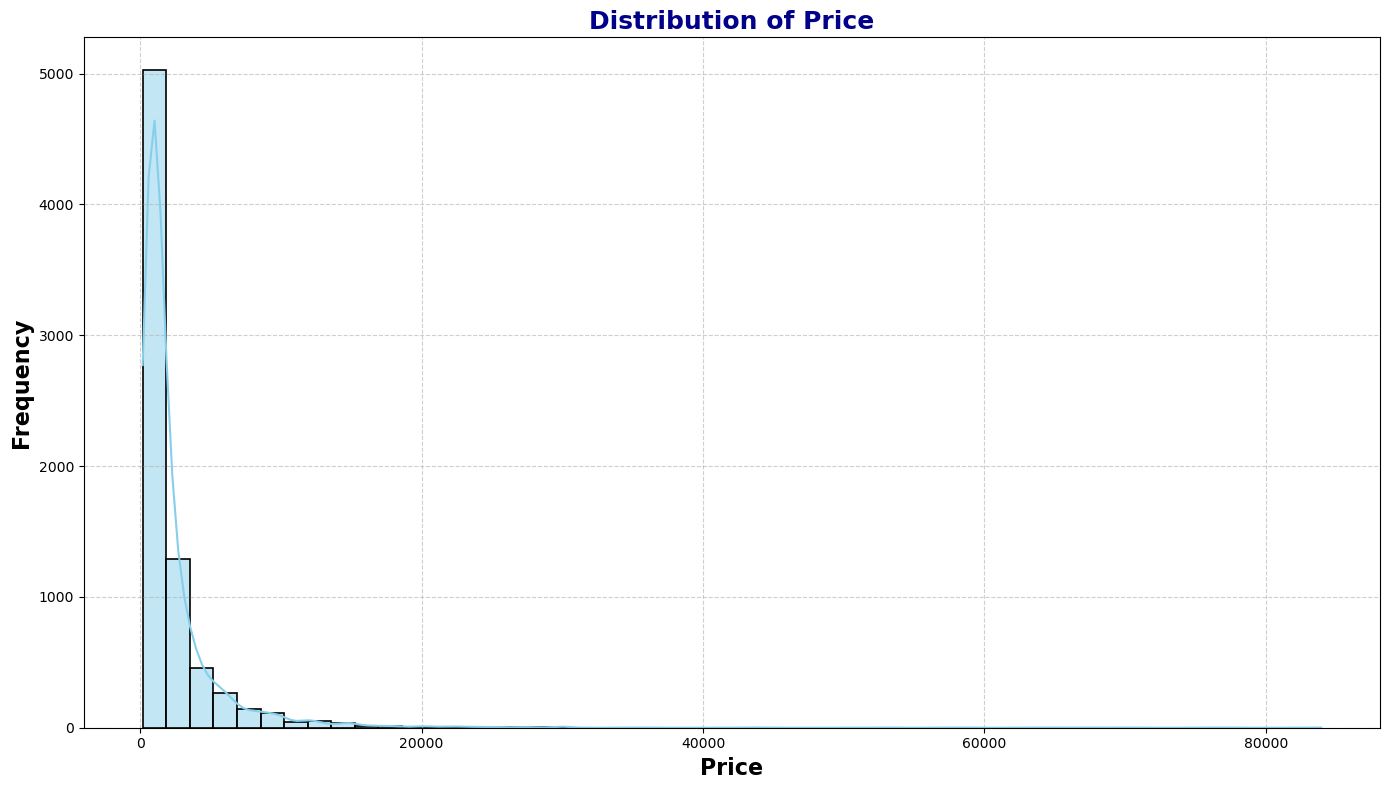

In [318]:
# Plot the distribution of Price
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['price'], kde=True, bins=50, color='skyblue', linewidth=1.2)
plt.title('Distribution of Price', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Price', fontsize=16, weight='bold')
plt.ylabel('Frequency', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



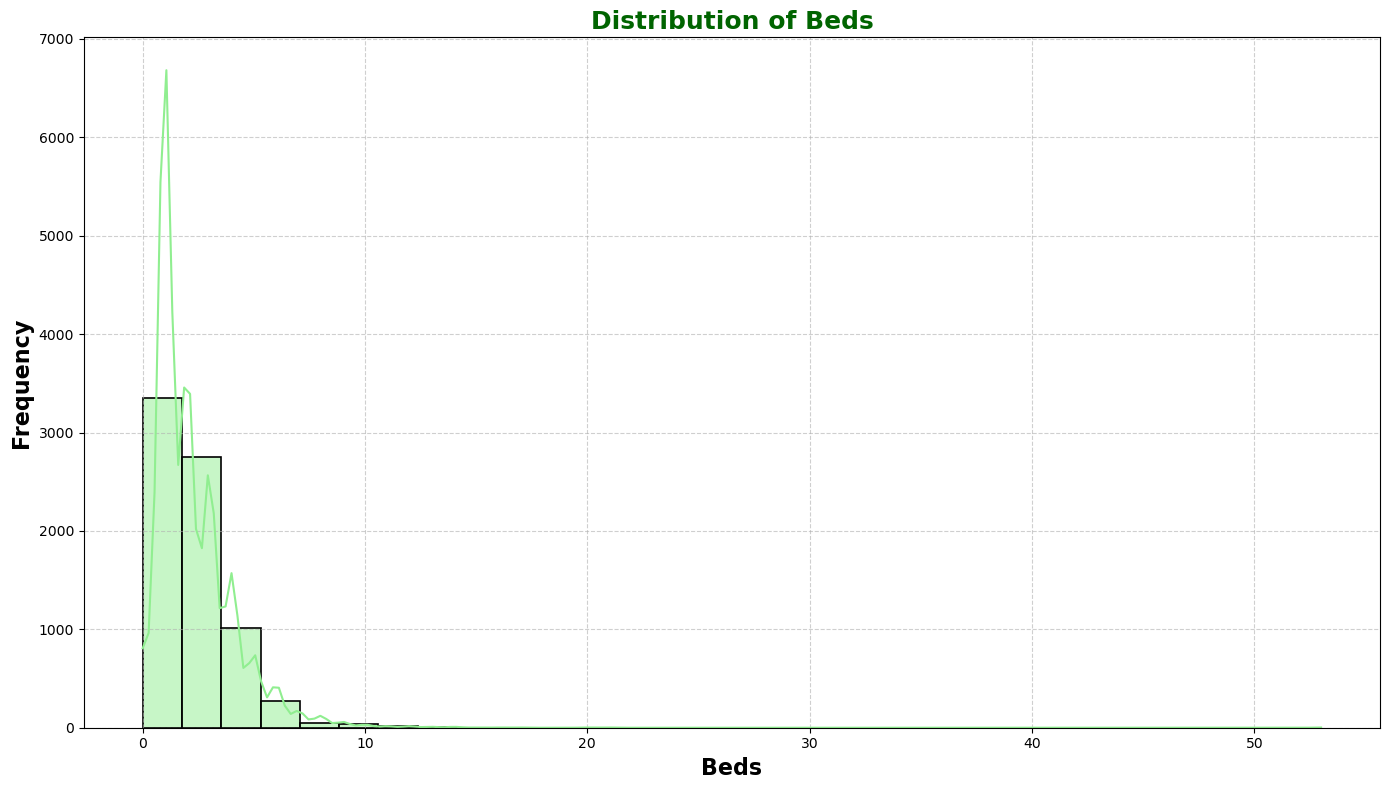

In [319]:
# Plot the distribution of Beds
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['beds'], kde=True, bins=30, color='lightgreen', linewidth=1.2)
plt.title('Distribution of Beds', fontsize=18, weight='bold', color='darkgreen')
plt.xlabel('Beds', fontsize=16, weight='bold')
plt.ylabel('Frequency', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



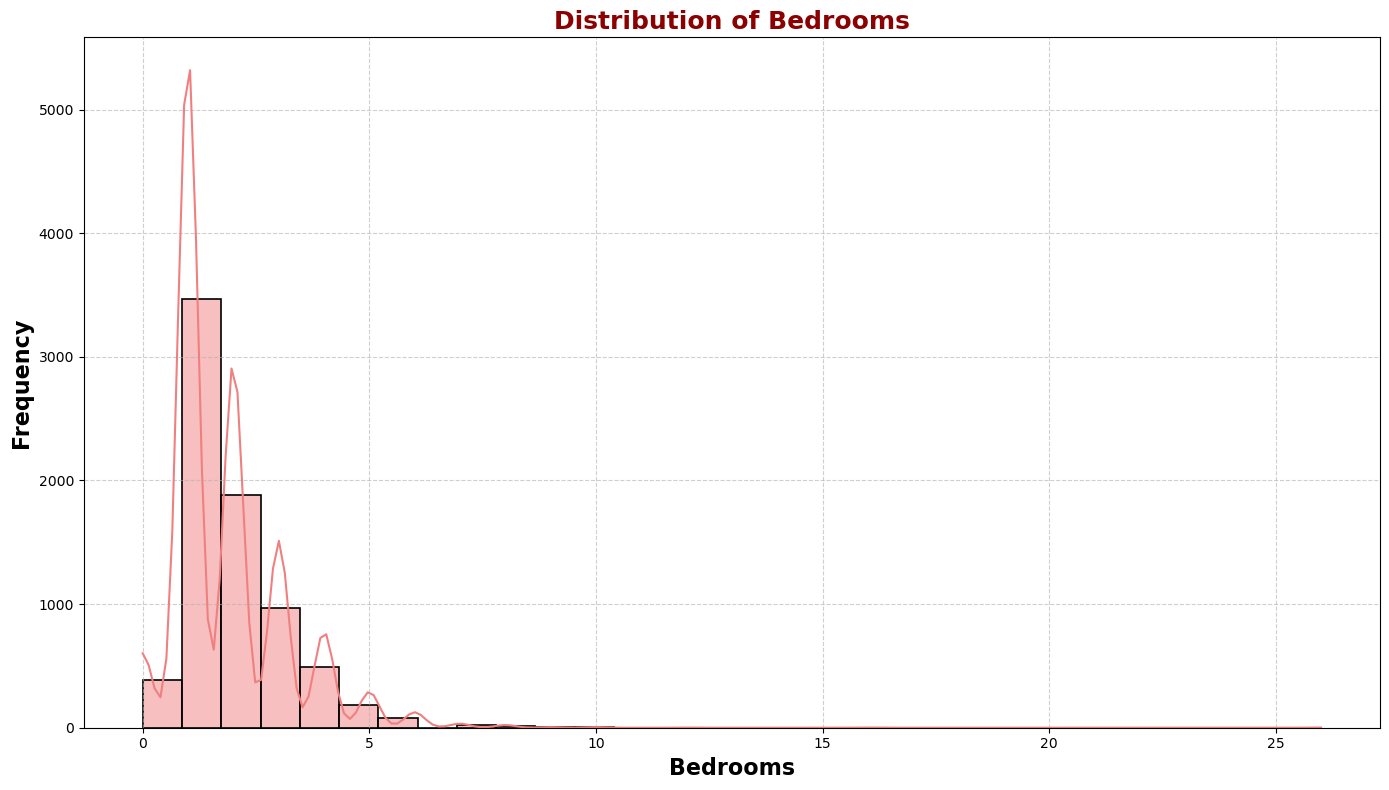

In [320]:
# Plot the distribution of Bedrooms
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['bedrooms'], kde=True, bins=30, color='lightcoral', linewidth=1.2)
plt.title('Distribution of Bedrooms', fontsize=18, weight='bold', color='darkred')
plt.xlabel('Bedrooms', fontsize=16, weight='bold')
plt.ylabel('Frequency', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



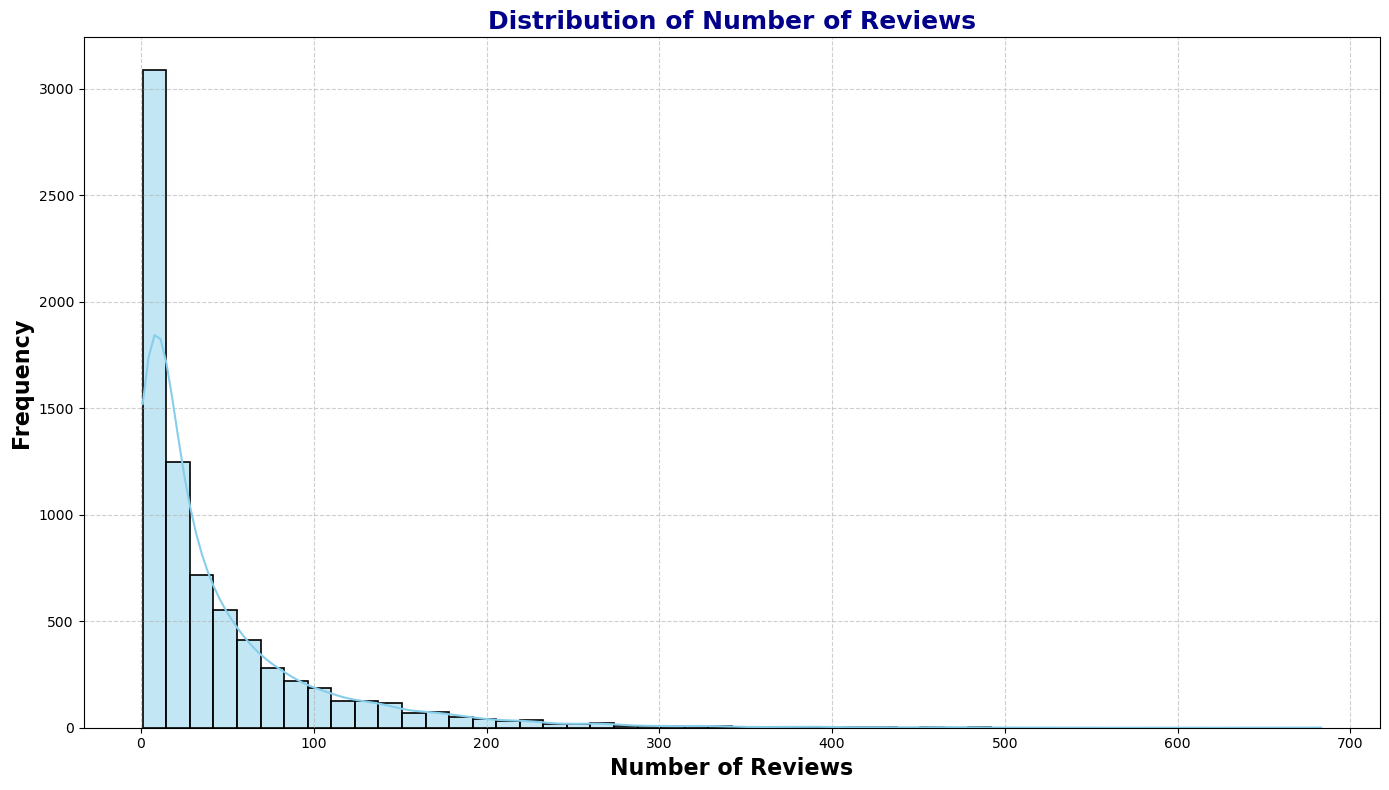

In [321]:
# Plot the distribution of Number of Reviews
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['number_of_reviews'], kde=True, bins=50, color='skyblue', linewidth=1.2)
plt.title('Distribution of Number of Reviews', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Number of Reviews', fontsize=16, weight='bold')
plt.ylabel('Frequency', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



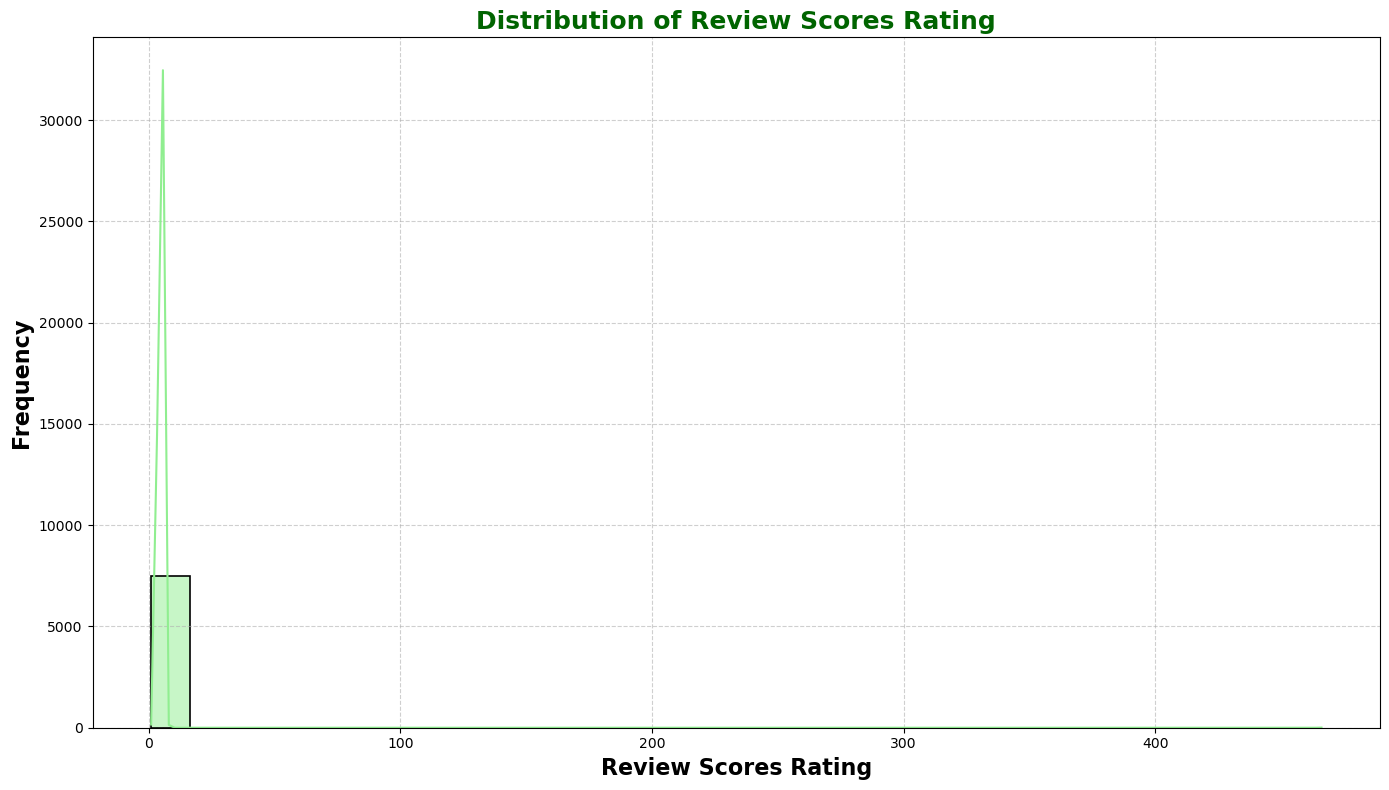

In [322]:
# Plot the distribution of Review Scores Rating
plt.figure(figsize=(14, 8))
sns.histplot(cleaned_df['review_scores_rating'], kde=True, bins=30, color='lightgreen', linewidth=1.2)
plt.title('Distribution of Review Scores Rating', fontsize=18, weight='bold', color='darkgreen')
plt.xlabel('Review Scores Rating', fontsize=16, weight='bold')
plt.ylabel('Frequency', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [323]:
import matplotlib.pyplot as plt



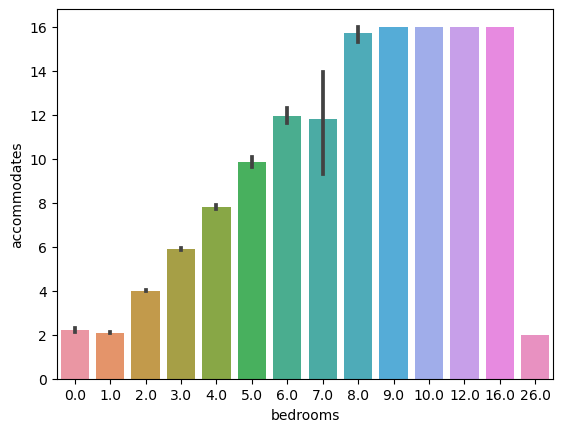

In [324]:
sns.barplot(x='bedrooms', y='accommodates', data=cleaned_df)
plt.show()


### 3.4.3 Relationships Between Variables
We explored relationships between variables to identify patterns and correlations. For example, the relationship between price and room_type was visualized using box plots, and the relationship between price and review_scores_rating was analyzed through scatter plots. We also used correlation heatmaps to visualize inter-variable correlations, such as the correlation between accommodates and beds.



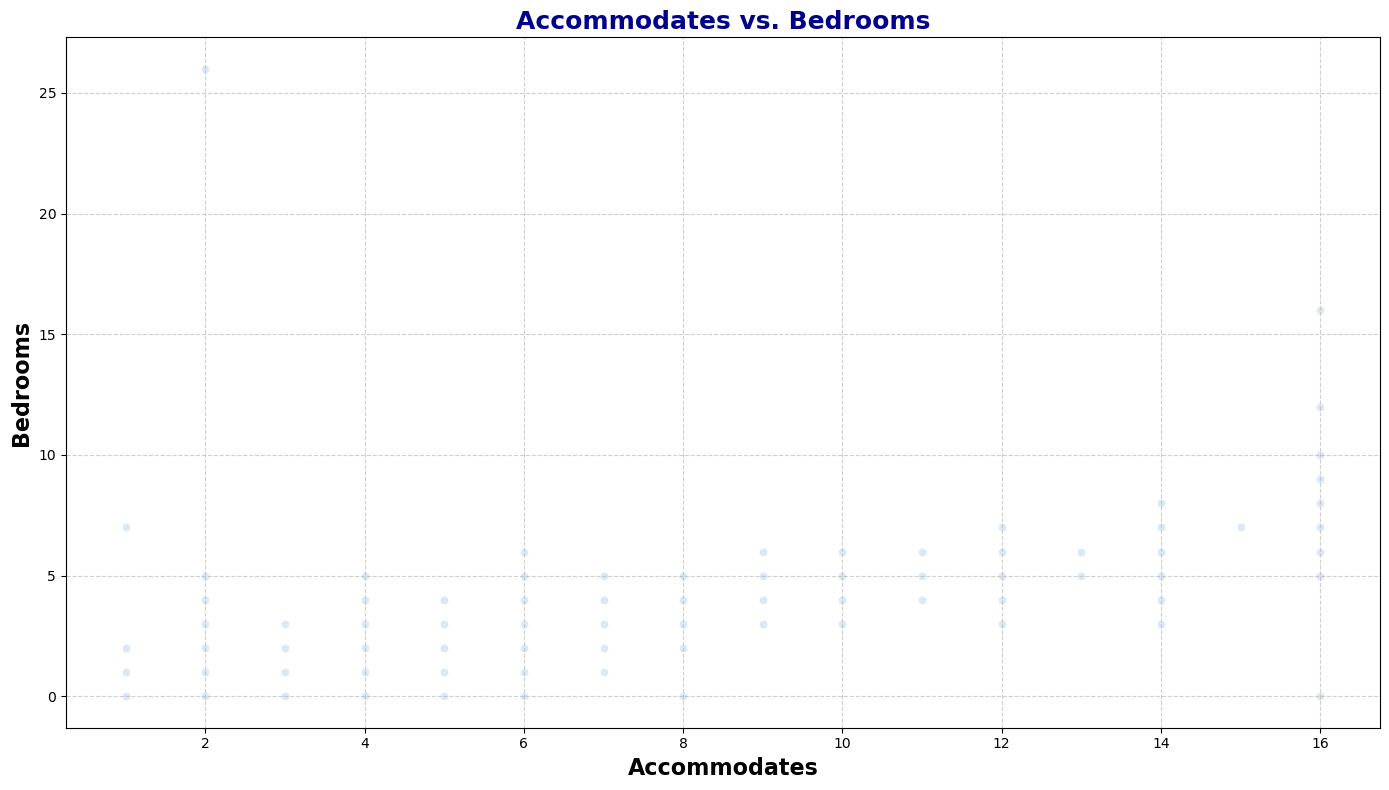

In [325]:
# Set a more attractive color palette
sns.set_palette("Blues")

# 1. Scatter Plots: Visualize relationships between numeric variables

# Plot: Accommodates vs. Bedrooms
plt.figure(figsize=(14, 8))
sns.scatterplot(x='accommodates', y='bedrooms', data=cleaned_df)
plt.title('Accommodates vs. Bedrooms', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Accommodates', fontsize=16, weight='bold')
plt.ylabel('Bedrooms', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



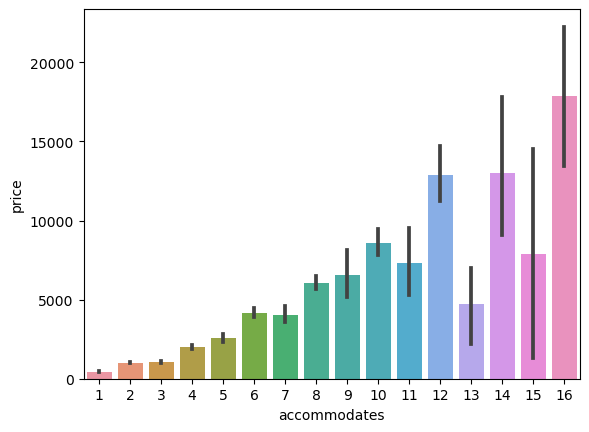

In [326]:

sns.barplot(x='accommodates', y='price', data=cleaned_df)
plt.show()


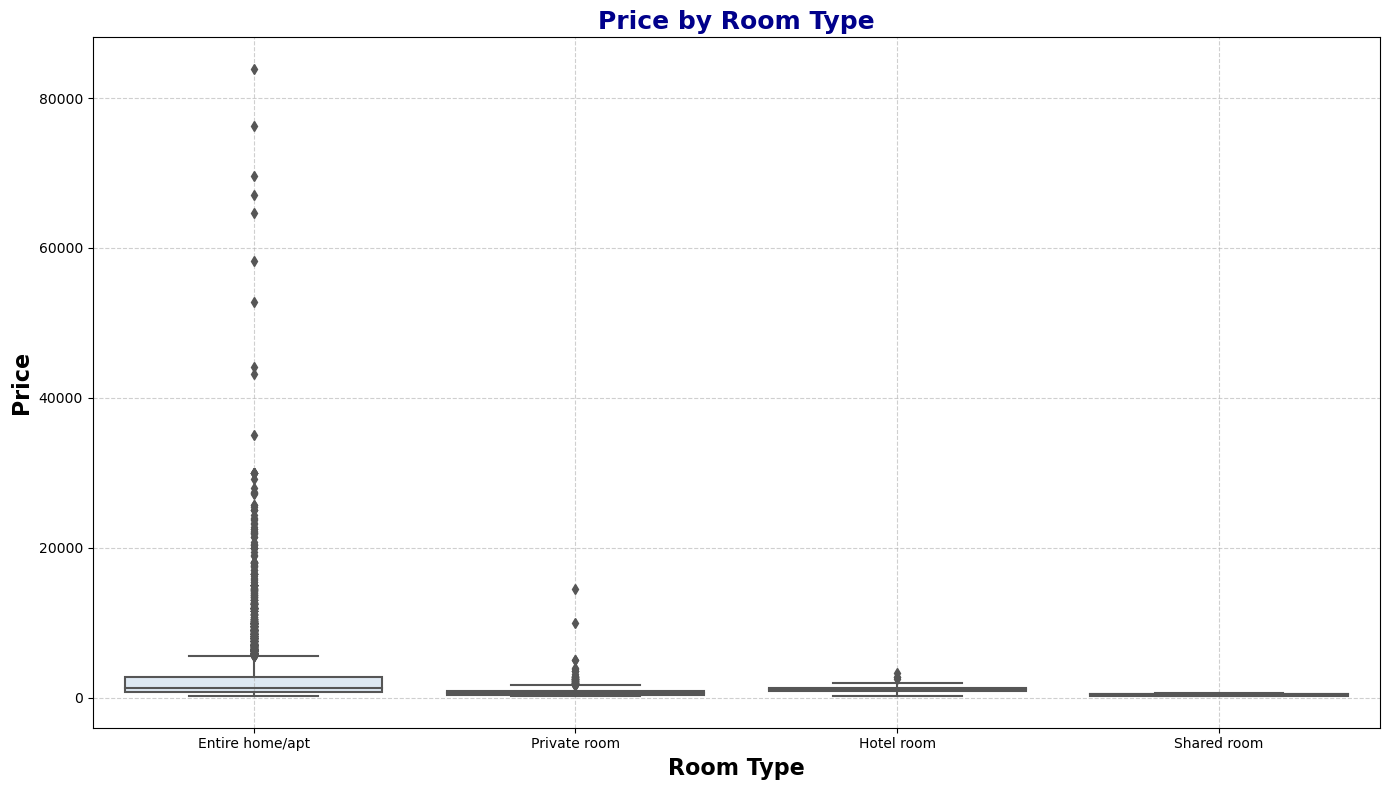

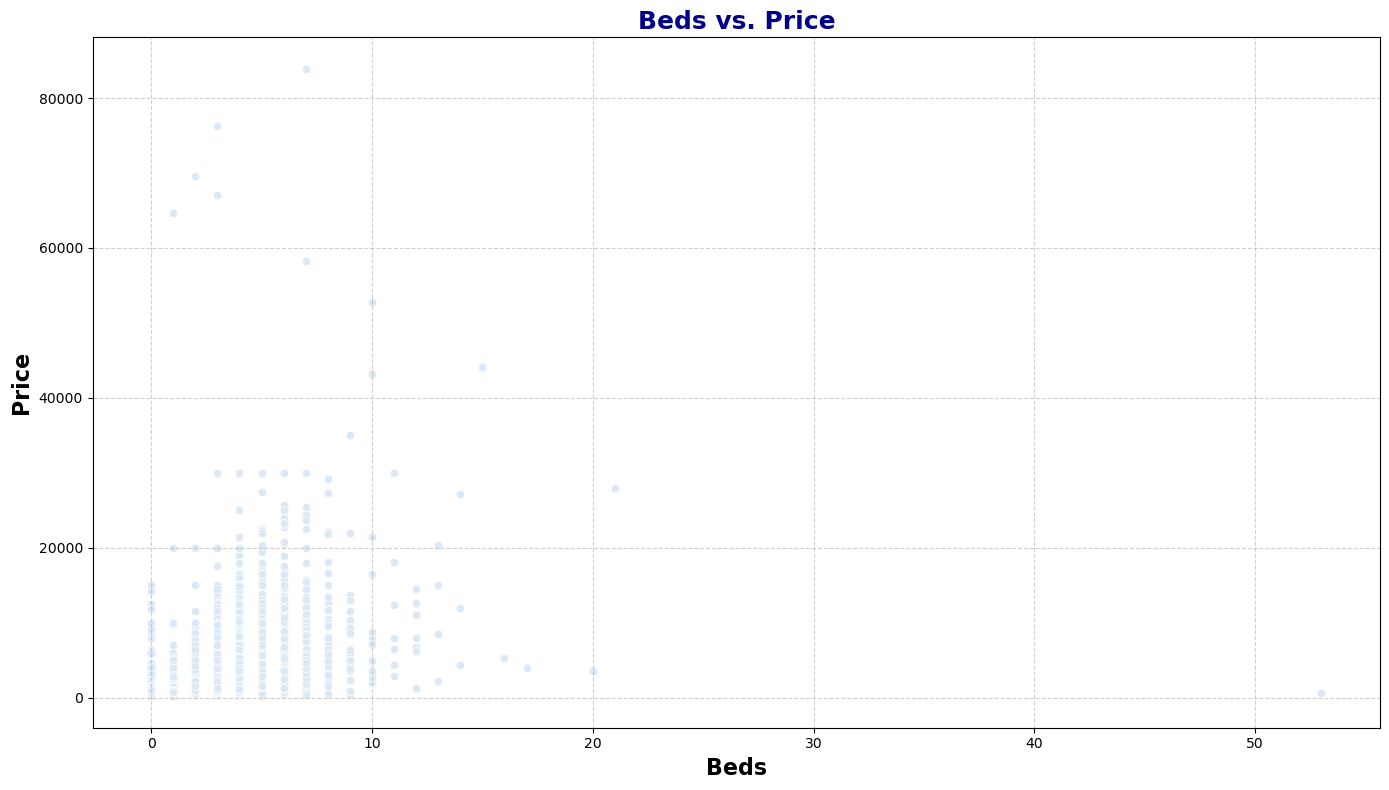

In [327]:
# 3. Box Plot: Price by Room Type
plt.figure(figsize=(14, 8))
sns.boxplot(x='room_type', y='price', data=cleaned_df)
plt.title('Price by Room Type', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Room Type', fontsize=16, weight='bold')
plt.ylabel('Price', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Scatter Plot: Beds vs. Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='beds', y='price', data=cleaned_df)
plt.title('Beds vs. Price', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Beds', fontsize=16, weight='bold')
plt.ylabel('Price', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



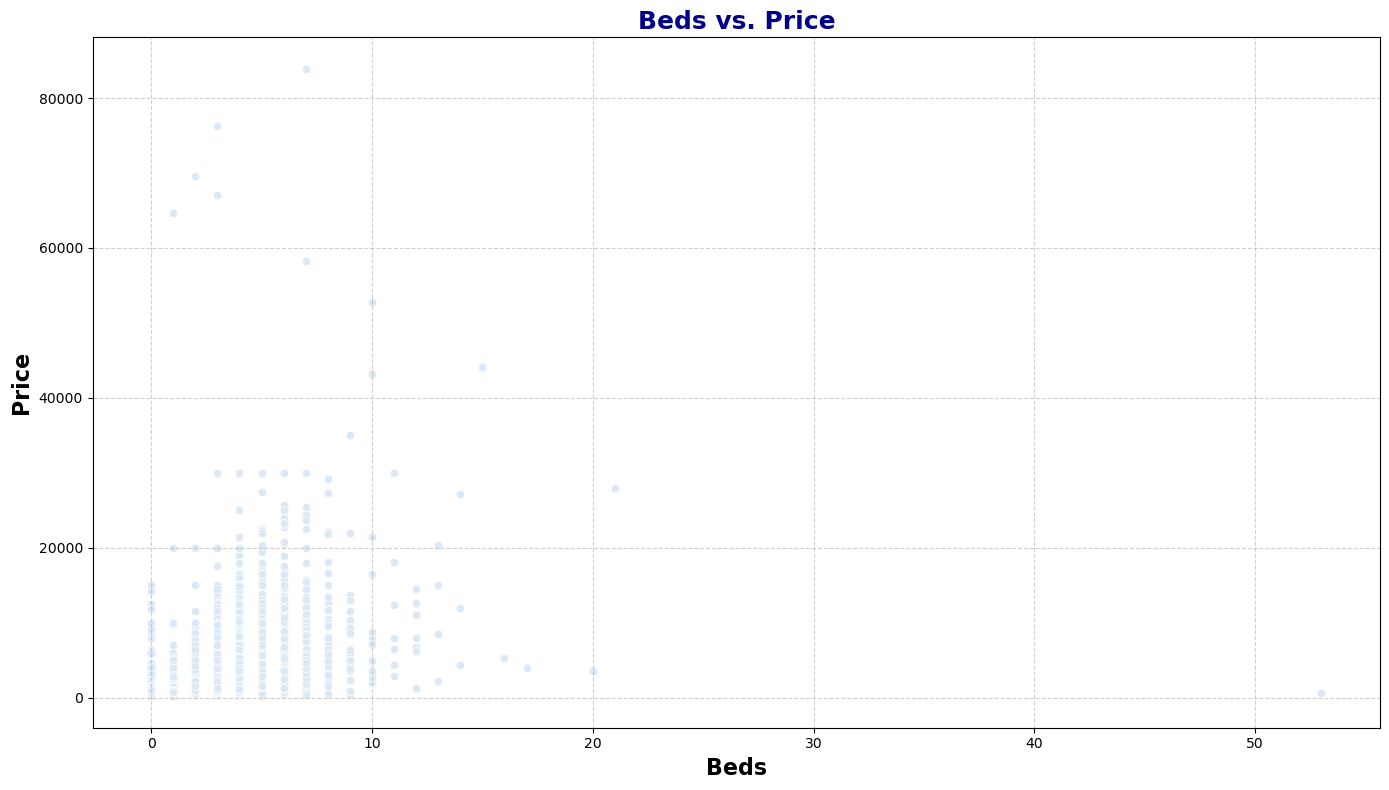

In [328]:
# 4. Scatter Plot: Beds vs. Price
plt.figure(figsize=(14, 8))
sns.scatterplot(x='beds', y='price', data=cleaned_df)
plt.title('Beds vs. Price', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Beds', fontsize=16, weight='bold')
plt.ylabel('Price', fontsize=16, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### **3.4.4 Correlation Analysis**

In this section, we examine the correlations between numeric variables in the dataset. Understanding these correlations helps identify important relationships between variables. We calculate the correlation matrix for the numeric columns and visualize the results using a heatmap. This allows us to easily spot strong positive or negative correlations and understand how key features relate to each other, such as how `price` relates to `review_scores_rating` or `number_of_reviews`.


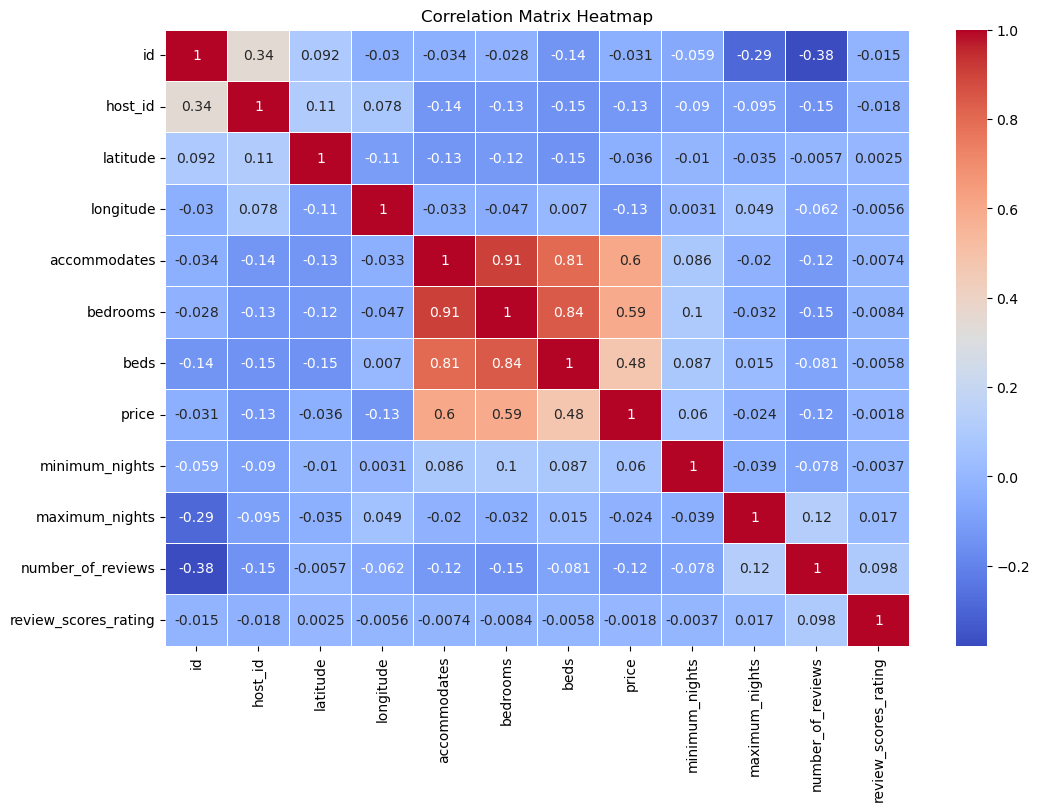

In [329]:

# Load the cleaned dataset
cleaned_df = pd.read_csv('cleaned_airbnb_data.csv')

# Check for correlations between numeric variables
numeric_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cleaned_df[numeric_cols].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 4. **Proposed Research Questions**

Based on the insights from the dataset, the following research questions can be explored further:

### 1. **How does the property type affect the price of a listing?**
   - **Variables**: `price`, `property_type`
   - **Analysis Type**: Group comparison using box plots and statistical tests (e.g., ANOVA or Kruskal-Wallis) to compare the average prices across different property types.

### 2. **What is the relationship between the number of reviews and the review scores for listings?**
   - **Variables**: `number_of_reviews`, `review_scores_rating`
   - **Analysis Type**: Correlation analysis and scatter plots to examine the relationship between review quantity and overall ratings.

### 3. **Can we predict the price of a listing based on the number of bedrooms, bathrooms, and its location?**
   - **Variables**: `price`, `bedrooms`, `bathrooms`, `latitude`, `longitude`
   - **Analysis Type**: Predictive modeling using linear regression or machine learning algorithms (e.g., Random Forest or Gradient Boosting) to predict price based on these features.



# 5. **Findings and Conclusions**

## **Main Findings**

1. **Price Distribution**:
   - The price distribution was highly skewed, with a significant number of listings priced moderately. However, there were several listings with extremely high prices, which could be outliers or unique premium listings (e.g., luxury properties). These outliers might skew any analysis that involves pricing, and they warrant further investigation to ensure they represent legitimate data points.

2. **Review Scores**:
   - Most listings had positive review scores, indicating that the majority of Airbnb hosts in Cape Town provide a satisfactory experience for guests. However, a few listings had notably low ratings. This trend highlights the importance of ensuring quality control, as reviews and ratings can have a direct impact on future bookings and overall success on the platform.

3. **Room Type and Price**:
   - A clear pattern was observed in the relationship between **room type** and **price**. Listings for entire homes had significantly higher prices compared to private or shared rooms. This is expected, as entire homes offer more privacy and space, which typically translates to higher costs. This insight can help inform pricing strategies for hosts depending on their offering type.

4. **Accommodates vs. Bedrooms**:
   - The correlation between the number of **bedrooms** and **accommodates** was positive, which is logical as larger properties tend to accommodate more guests. This insight aligns with general expectations about the relationship between the number of bedrooms and the accommodation capacity. It suggests that hosts can potentially charge higher prices based on the number of guests they can accommodate.

5. **Beds vs. Price**:
   - A positive relationship between **beds** and **price** was observed, indicating that properties with more beds tend to have higher prices. This finding reinforces the notion that larger properties are generally priced higher, likely because they can accommodate more guests and offer more amenities.

6. **Correlation Between Location and Price**:
   - The **latitude** and **longitude** of the listings showed minimal correlation with other features like price or review scores, which suggests that pricing in Cape Town may not be strongly driven by geographic location alone. However, this might be worth exploring further by segmenting the data into different neighborhoods or areas.

7. **Missing Data**:
   - Some variables, particularly those related to host details (e.g., `host_location` and `host_about`), had significant amounts of missing data. This could affect analyses that depend on these features. The missing data for certain columns, especially the `license` and `host_is_superhost` columns, was mostly handled by dropping rows with missing values. This cleaning process ensured that the dataset remained useful for analysis without unnecessary noise.

## **Trends and Patterns**

- **Luxury Listings**: A few listings with exceptionally high prices likely represent premium properties. These may have unique features such as luxury amenities, large spaces, or desirable locations (e.g., beachfront properties). Further segmentation of these listings could help understand the factors contributing to their higher prices.
  
- **Host Experience**: Listings by hosts with **Superhost** status tend to have better ratings and higher prices. This highlights the role of host reliability and reputation in shaping the Airbnb market, where highly-rated hosts may attract more bookings and justify higher prices.

- **Review Scores**: The high concentration of positive review scores suggests that most guests are satisfied with their stays. However, the existence of low review scores may point to inconsistencies in quality across properties. A deeper dive into these properties might reveal common issues such as cleanliness, accuracy of listings, or customer service.

## **Suggestions for Further Analysis**

1. **Outlier Investigation**:
   - A deeper exploration of the high-priced listings could help identify whether these outliers are legitimate (e.g., luxury properties or unique offerings) or if there are data entry errors. Identifying the true nature of these high-priced listings could significantly improve the analysis of pricing trends.

2. **Geographic Analysis**:
   - Since **latitude** and **longitude** showed minimal correlation with other variables, a more detailed geographic analysis could help understand how location affects pricing. It might be useful to map listings by neighborhood or proximity to key landmarks (e.g., beaches, parks, tourist attractions) to see if location plays a stronger role than initially observed.

3. **Review Sentiment Analysis**:
   - Given the importance of guest reviews, sentiment analysis could be applied to the **description** and **neighborhood_overview** columns to understand the key factors driving positive or negative feedback. This analysis would provide insights into what guests value the most in their stays.

4. **Predictive Modeling**:
   - Although no formal predictive modeling was conducted in this exploration, using machine learning models (e.g., linear regression, random forests) to predict **price** based on variables like **accommodates**, **bedrooms**, **room_type**, and **review_scores_rating** could help identify key price drivers and develop a pricing model.

5. **Feature Engineering**:
   - Further feature engineering could be valuable, especially in terms of creating new features from existing ones (e.g., calculating the average number of reviews per month or creating a "luxury" binary variable based on price). This would enrich the dataset and could help improve modeling accuracy in future analyses.

---

In conclusion, the analysis provided valuable insights into the characteristics and pricing dynamics of Airbnb listings in Cape Town. The findings revealed clear trends regarding room type, accommodation size, pricing, and review scores, while also highlighting some anomalies, such as high-priced listings that may need further investigation. Further analysis could explore the impact of location, host experience, and guest reviews in more depth, and predictive models could be employed to better understand the factors influencing pricing and review scores.

# 6. **References**

1. **Inside Airbnb Project**:  
   The dataset used in this analysis is sourced from the **Inside Airbnb** project, which provides detailed and publicly accessible data on Airbnb listings across various cities worldwide. For more information on the project, visit the [Inside Airbnb website](http://insideairbnb.com).

2. **Python Libraries**:
   - **pandas**: A powerful library for data manipulation and analysis, used for loading, cleaning, and exploring the datasets.  
     Documentation: [https://pandas.pydata.org/](https://pandas.pydata.org/)
   
   - **NumPy**: A fundamental package for numerical computing in Python, used for handling arrays and numerical operations.  
     Documentation: [https://numpy.org/](https://numpy.org/)

   - **Matplotlib**: A plotting library for creating static, animated, and interactive visualizations in Python. Used for creating plots to visualize distributions and relationships.  
     Documentation: [https://matplotlib.org/](https://matplotlib.org/)
   
   - **Seaborn**: A Python visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics. Used for creating more advanced plots, such as histograms, box plots, and scatter plots.  
     Documentation: [https://seaborn.pydata.org/](https://seaborn.pydata.org/)
   
   - **SciPy**: A library for scientific and technical computing, often used for statistical analysis and hypothesis testing.  
     Documentation: [https://scipy.org/](https://scipy.org/)

3. **pandas_profiling**: A tool used for quick exploratory data analysis and generating summary reports of datasets (if applicable).  
   Documentation: [https://pandas-profiling.github.io/pandas-profiling/](https://pandas-profiling.github.io/pandas-profiling/)

These sources and libraries played a crucial role in the data cleaning, wrangling, and exploratory analysis process, providing the necessary tools to manipulate and visualize the data effectively.